In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")

# Set default font size and facecolor
plt.rcParams["font.size"] = 24
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["axes.facecolor"] = "white"

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize
figsize(15, 12)

# Seaborn for visualization
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
data = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


1 - Renaming columns for ease of use
2 - Droping games without a year of release or genre
3 - Creating a new column for age of the game

In [ ]:
data = data.rename(columns={"Year_of_Release": "Year", 
                            "NA_Sales": "NA",
                            "EU_Sales": "EU",
                            "JP_Sales": "JP",
                            "Other_Sales": "Other",
                            "Global_Sales": "Global"})
data = data[data["Year"].notnull()]
data = data[data["Genre"].notnull()]
data["Year"] = data["Year"].apply(int)
data["Age"] = 2018 - data["Year"]
data.describe(include="all")

,Name,Platform,Year,Genre,Publisher,NA,EU,JP,Other,Global,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Age
count,16448,16448,16448.000000,16448,16416,16448.000000,16448.000000,16448.000000,16448.000000,16448.00000,7983.000000,7983.000000,9840,7463.000000,9907,9769,16448.000000
unique,11429,31,NaN,12,579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96,NaN,1680,8,NaN
top,Need for Speed: Most Wanted,PS2,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tbd,NaN,Ubisoft,E,NaN
freq,12,2127,NaN,3308,1344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2377,NaN,201,3922,NaN
mean,NaN,NaN,2006.488996,NaN,NaN,0.263965,0.145895,0.078472,0.047583,0.53617,68.994363,26.441313,NaN,163.015141,NaN,NaN,11.511004
std,NaN,NaN,5.877470,NaN,NaN,0.818286,0.506660,0.311064,0.187984,1.55846,13.920060,19.008136,NaN,563.863327,NaN,NaN,5.877470
min,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.01000,13.000000,3.000000,NaN,4.000000,NaN,NaN,-2.000000
25%,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.06000,60.000000,12.000000,NaN,10.000000,NaN,NaN,8.000000
50%,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.17000,71.000000,22.000000,NaN,24.000000,NaN,NaN,11.000000
75%,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.030000,0.47000,79.000000,36.000000,NaN,81.000000,NaN,NaN,15.000000


Visualising the data

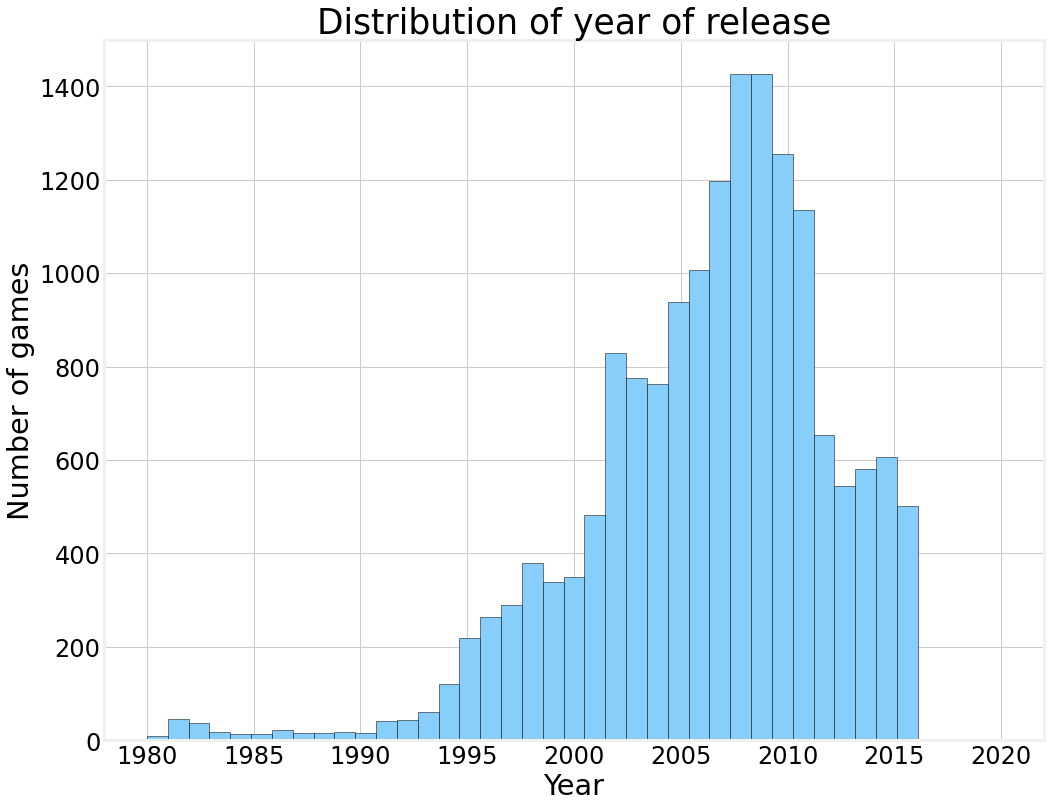

In [ ]:
# Histogram plot of Year of release
num_years = data["Year"].max() - data["Year"].min() + 1
plt.hist(data["Year"], bins=num_years, color="lightskyblue", edgecolor="black")
plt.title("Distribution of year of release")
plt.xlabel("Year")
plt.ylabel("Number of games");


In [ ]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : "Missing Values", 1 : "% of Total Values"})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        "% of Total Values", ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

Checking the missing values in the data

In [ ]:
missing_values_table(data)

Your selected dataframe has 17 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
User_Score,8985,54.6
User_Count,8985,54.6
Critic_Score,8465,51.5
Critic_Count,8465,51.5
Rating,6679,40.6
Developer,6541,39.8
Publisher,32,0.2


More than 50% of user and critic scores are missing. It is advisable to drop features with a lot of missing values; however, for sales prediction scores are invaluable and hence left untouched. 

In [ ]:
def rm_outliers(df, list_of_keys):
    df_out = df
    for key in list_of_keys:
        # Calculate first and third quartile
        first_quartile = df_out[key].describe()["25%"]
        third_quartile = df_out[key].describe()["75%"]

        # Interquartile range
        iqr = third_quartile - first_quartile

        # Remove outliers
        removed = df_out[(df_out[key] <= (first_quartile - 3 * iqr)) |
                    (df_out[key] >= (third_quartile + 3 * iqr))] 
        df_out = df_out[(df_out[key] > (first_quartile - 3 * iqr)) &
                    (df_out[key] < (third_quartile + 3 * iqr))]
    return df_out, removed

In [ ]:
data, rmvd_global = rm_outliers(data, ["Global"])
data.describe()

,Year,NA,EU,JP,Other,Global,Critic_Score,Critic_Count,User_Score,User_Count,Age
count,15401.000000,15401.000000,15401.000000,15401.000000,15401.000000,15401.000000,7286.000000,7286.000000,6747.000000,6747.000000,15401.000000
mean,2006.592624,0.144688,0.072628,0.047301,0.024357,0.289258,67.779028,24.518117,7.079976,111.325033,11.407376
std,5.758078,0.210709,0.131408,0.130786,0.050152,0.346918,13.612120,17.194878,1.511031,406.635191,5.758078
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000,-2.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,59.000000,11.000000,6.300000,9.000000,8.000000
50%,2007.000000,0.070000,0.020000,0.000000,0.010000,0.150000,70.000000,20.000000,7.400000,21.000000,11.000000
75%,2010.000000,0.190000,0.080000,0.030000,0.030000,0.380000,78.000000,34.000000,8.200000,61.000000,15.000000
max,2020.000000,1.670000,1.580000,1.650000,1.180000,1.690000,98.000000,106.000000,9.700000,10665.000000,38.000000


evaluating the differences between scores

In [ ]:
data["Has_Score"] = data["User_Score"].notnull() & data["Critic_Score"].notnull()
rmvd_global["Has_Score"] = rmvd_global["User_Score"].notnull() & rmvd_global["Critic_Score"].notnull()

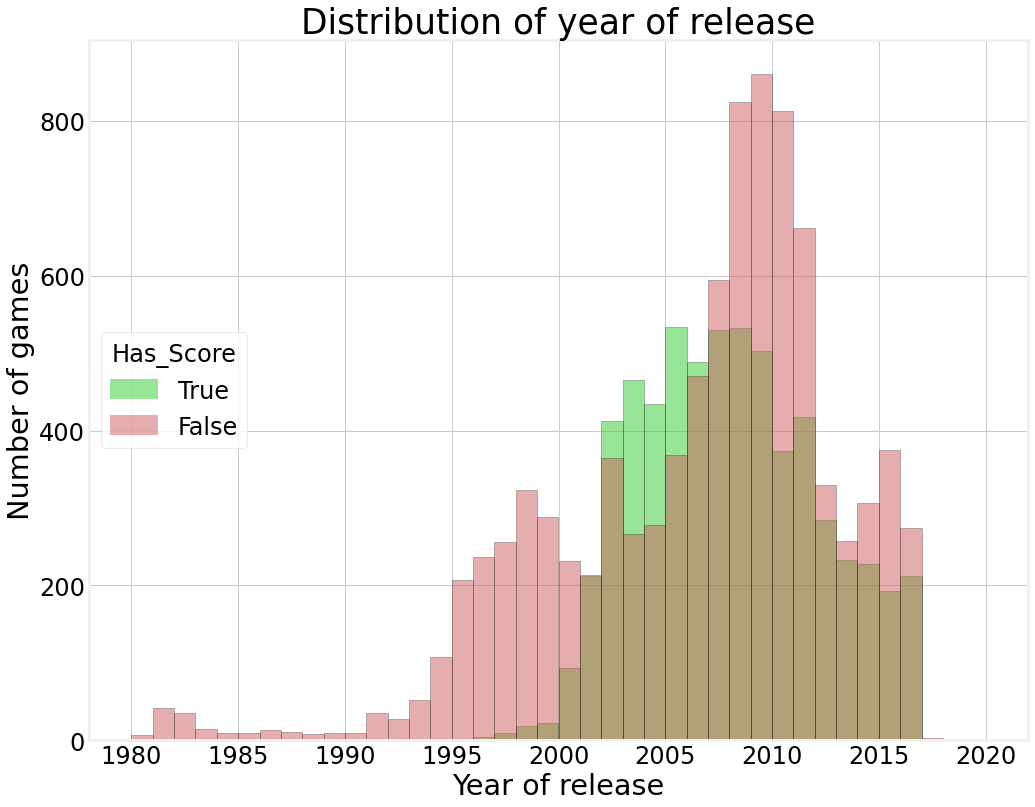

In [ ]:
from matplotlib.lines import Line2D
plt.hist(data[data["Has_Score"]==True]["Year"], color="limegreen", alpha=0.5, 
         bins=range(1980, 2021), edgecolor="black")
plt.hist(data[data["Has_Score"]==False]["Year"], color="indianred", alpha=0.5, 
         bins=range(1980, 2021), edgecolor="black")
plt.title("Distribution of year of release")
plt.xlabel("Year of release")
plt.ylabel("Number of games")
plt.legend(handles=[Line2D([0], [0], color="limegreen", lw=20, label="True", alpha=0.5),
                    Line2D([0], [0], color="indianred", lw=20, label="False", alpha=0.5)],
           title="Has_Score", loc=6);

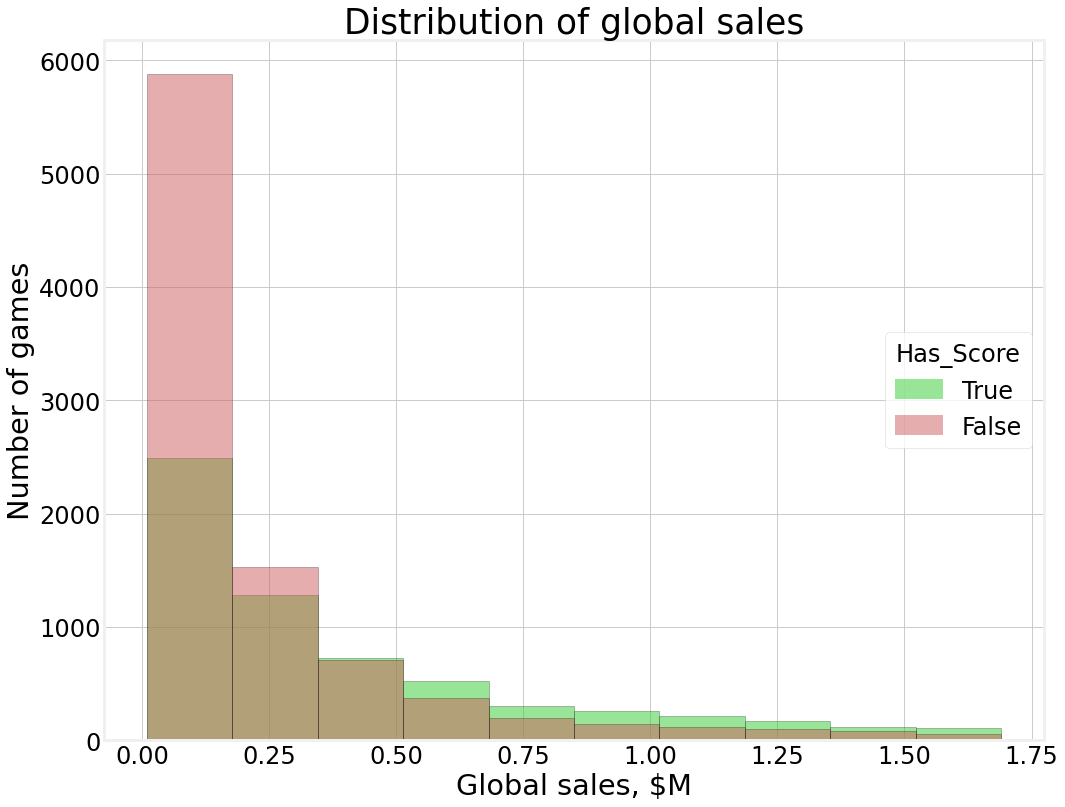

In [ ]:
plt.hist(data[data["Has_Score"]==True]["Global"], color="limegreen", alpha=0.5, 
         edgecolor="black")
plt.hist(data[data["Has_Score"]==False]["Global"], color="indianred", alpha=0.5, 
         edgecolor="black")
plt.title("Distribution of global sales")
plt.xlabel("Global sales, $M")
plt.ylabel("Number of games")
plt.legend(handles=[Line2D([0], [0], color="limegreen", lw=20, label="True", alpha=0.5),
                    Line2D([0], [0], color="indianred", lw=20, label="False", alpha=0.5)],
           title="Has_Score", loc=7);

Games without score tend to have less global sales.

Sales by region

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update

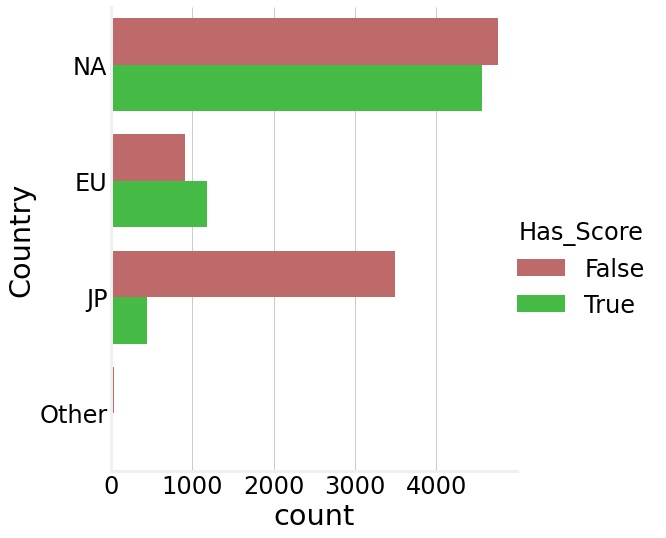

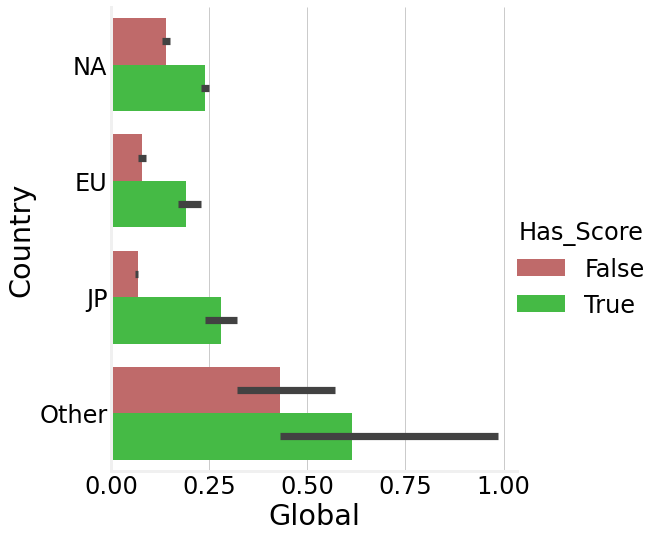

In [ ]:
data["Country"] = data[["NA", "EU", "JP", "Other"]].idxmax(1, skipna=True)
palette = {True: "limegreen", False: "indianred"}
sns.factorplot(y="Country", hue="Has_Score", data=data, size=8, kind="count", palette=palette)
sns.factorplot(y="Country", x="Global", hue="Has_Score", data=data, size=8, kind="bar", palette=palette,
               estimator=lambda x: np.median(x));


Model 1: For this model we drop games that don't have a user score, critic score or rating.

In [ ]:
scored = data.dropna(subset=["User_Score", "Critic_Score", "Rating"])
scored.describe()

,Year,NA,EU,JP,Other,Global,Critic_Score,Critic_Count,User_Score,User_Count,Age
count,6137.000000,6137.000000,6137.000000,6137.000000,6137.000000,6137.000000,6137.000000,6137.000000,6137.000000,6137.000000,6137.000000
mean,2007.422682,0.209774,0.112472,0.029221,0.039420,0.391119,68.976047,26.910706,7.139661,118.897181,10.577318
std,4.171197,0.231764,0.154954,0.094207,0.059871,0.389871,13.627623,17.416288,1.450253,424.446207,4.171197
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.500000,4.000000,2.000000
25%,2004.000000,0.050000,0.010000,0.000000,0.010000,0.100000,61.000000,13.000000,6.400000,10.000000,8.000000
50%,2007.000000,0.130000,0.050000,0.000000,0.020000,0.240000,71.000000,23.000000,7.500000,23.000000,11.000000
75%,2010.000000,0.290000,0.150000,0.000000,0.050000,0.560000,79.000000,37.000000,8.200000,66.000000,14.000000
max,2016.000000,1.670000,1.580000,1.390000,1.180000,1.690000,98.000000,106.000000,9.600000,10665.000000,33.000000


In [ ]:
scored, rmvd_user_count = rm_outliers(scored, ["User_Count"])
scored.describe()

,Year,NA,EU,JP,Other,Global,Critic_Score,Critic_Count,User_Score,User_Count,Age
count,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000
mean,2007.055837,0.205403,0.098572,0.028995,0.036368,0.369597,67.815866,24.958439,7.124575,37.459523,10.944163
std,4.010373,0.225580,0.138941,0.095492,0.056428,0.367824,13.408831,15.689528,1.440391,44.572477,4.010373
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.500000,4.000000,2.000000
25%,2004.000000,0.060000,0.010000,0.000000,0.010000,0.100000,60.000000,13.000000,6.400000,9.000000,8.000000
50%,2007.000000,0.130000,0.040000,0.000000,0.020000,0.230000,70.000000,22.000000,7.400000,20.000000,11.000000
75%,2010.000000,0.280000,0.130000,0.000000,0.047500,0.520000,78.000000,34.000000,8.200000,45.000000,14.000000
max,2016.000000,1.670000,1.160000,1.390000,1.130000,1.690000,98.000000,91.000000,9.600000,233.000000,33.000000


In [ ]:
scored["Platform"].unique(), scored["Genre"].unique(), scored["Rating"].unique()

(array(['PS2', 'GBA', 'X360', 'PS3', 'PC', 'Wii', 'PSP', 'PS', 'XB', 'GC',
        'DS', 'XOne', '3DS', 'DC', 'PS4', 'WiiU', 'PSV'], dtype=object),
 array(['Shooter', 'Action', 'Role-Playing', 'Racing', 'Simulation',
        'Sports', 'Fighting', 'Platform', 'Misc', 'Strategy', 'Puzzle',
        'Adventure'], dtype=object),
 array(['M', 'E', 'T', 'E10+', 'RP'], dtype=object))

There are 17 unique platfoms, 12 unique genres and 5 ratings in the remaining data. In the next model we shall group platforms to reduce amount.

In [ ]:
pip install --upgrade category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 2.5 MB/s 


In [ ]:
import category_encoders as ce
# Select the numeric columns
numeric_subset = scored.select_dtypes("number").drop(columns=["NA", "EU", "JP", "Other", "Year"])

# Select the categorical column
categorical_subset = scored[["Platform", "Genre", "Rating"]]

# One hot encode
encoder = ce.one_hot.OneHotEncoder()
categorical_subset = encoder.fit_transform(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

# Find correlations with the score 
correlations = features.corr()["Global"].dropna().sort_values()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
correlations.head(5)


Platform_5    -0.186725
Genre_10      -0.094686
Genre_12      -0.084227
Platform_17   -0.069683
Platform_15   -0.062370
Name: Global, dtype: float64

In [ ]:
correlations.tail(5)


User_Score      0.155470
User_Count      0.252651
Critic_Score    0.281545
Critic_Count    0.292327
Global          1.000000
Name: Global, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


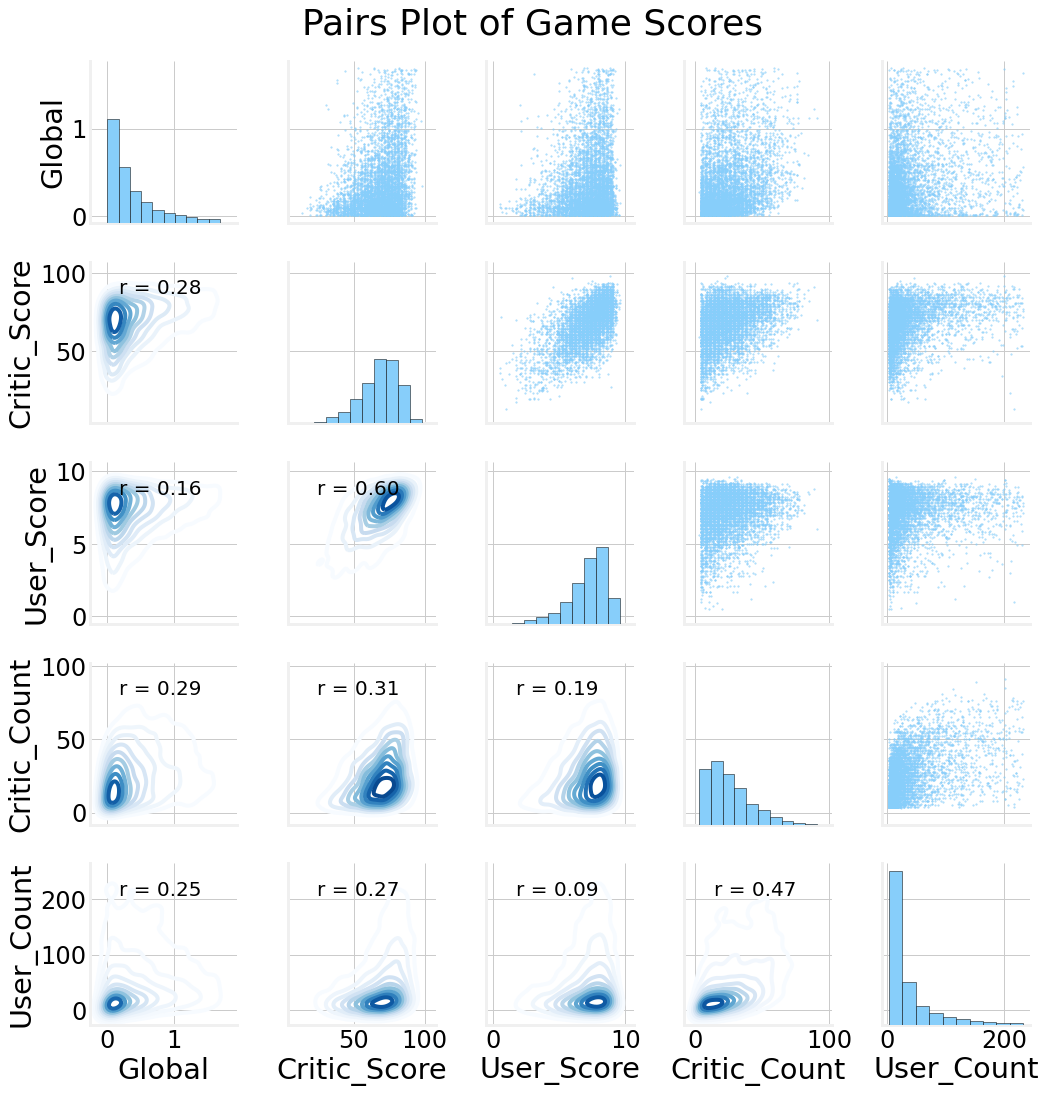

In [ ]:
# Extract the columns to  plot
plot_data = features[["Global", "Critic_Score", "User_Score",
                      "Critic_Count", "User_Count"]]

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)
    
# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3)

# Upper is a scatter plot
grid.map_upper(plt.scatter, color = "lightskyblue", alpha = 0.6, marker=".", s=10)

# Diagonal is a histogram
grid.map_diag(plt.hist, color = "lightskyblue", edgecolor="black")

# Bottom is correlation and density plot
grid.map_lower(corr_func)
grid.map_lower(sns.kdeplot, cmap = plt.cm.Blues)

# Title for entire plot
plt.suptitle("Pairs Plot of Game Scores", size = 36, y = 1.02);

In [ ]:
features.shape

(5534, 40)

Splitting data into train and test sets.

In [ ]:
from sklearn.model_selection import train_test_split
basic_target = pd.Series(features["Global"])
basic_features = features.drop(columns="Global")
features_train, features_test, target_train, target_test = train_test_split(basic_features, basic_target, 
                                                                            test_size=0.2,
                                                                            random_state=42)
print(features_train.shape)
print(features_test.shape)
print(target_train.shape)
print(target_test.shape)

(4427, 39)
(1107, 39)
(4427,)
(1107,)


Defining a function to evaluate the model. We use the mean absolute error.

In [ ]:
def mae(y_true, y_pred):
    return np.average(abs(y_true - y_pred))

In [ ]:
baseline_guess = np.median(target_train)
basic_baseline_mae = mae(target_test, baseline_guess)
print("Baseline guess for global sales is: {:.02f}".format(baseline_guess))
print("Baseline Performance on the test set: MAE = {:.04f}".format(basic_baseline_mae))

Baseline guess for global sales is: 0.23
Baseline Performance on the test set: MAE = 0.2787


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(features_train, target_train)
    
    # Make predictions and evalute
    model_pred = model.predict(features_test)
    model_mae = mae(target_test, model_pred)
    
    # Return the performance metric
    return model_mae

In [ ]:
lr = LinearRegression()
lr_mae = fit_and_evaluate(lr)

print("Linear Regression Performance on the test set: MAE = {:.04f}".format(lr_mae))

Linear Regression Performance on the test set: MAE = 0.2361


In [ ]:
svm = SVR(C = 1000, gamma=0.1)
svm_mae = fit_and_evaluate(svm)

print("Support Vector Machine Regression Performance on the test set: MAE = {:.04f}".format(svm_mae))

Support Vector Machine Regression Performance on the test set: MAE = 0.2859


In [ ]:
random_forest = RandomForestRegressor(random_state=60)
random_forest_mae = fit_and_evaluate(random_forest)

print("Random Forest Regression Performance on the test set: MAE = {:.04f}".format(random_forest_mae))

Random Forest Regression Performance on the test set: MAE = 0.2219


In [ ]:
gradient_boosting = GradientBoostingRegressor(random_state=60)
gradient_boosting_mae = fit_and_evaluate(gradient_boosting)

print("Gradient Boosting Regression Performance on the test set: MAE = {:.04f}".format(gradient_boosting_mae))

Gradient Boosting Regression Performance on the test set: MAE = 0.2197


In [ ]:
knn = KNeighborsRegressor(n_neighbors=10)
knn_mae = fit_and_evaluate(knn)

print("K-Nearest Neighbors Regression Performance on the test set: MAE = {:.04f}".format(knn_mae))

K-Nearest Neighbors Regression Performance on the test set: MAE = 0.2557


In [ ]:
ridge = Ridge(alpha=10)
ridge_mae = fit_and_evaluate(ridge)

print("Ridge Regression Performance on the test set: MAE = {:.04f}".format(ridge_mae))

Ridge Regression Performance on the test set: MAE = 0.2354


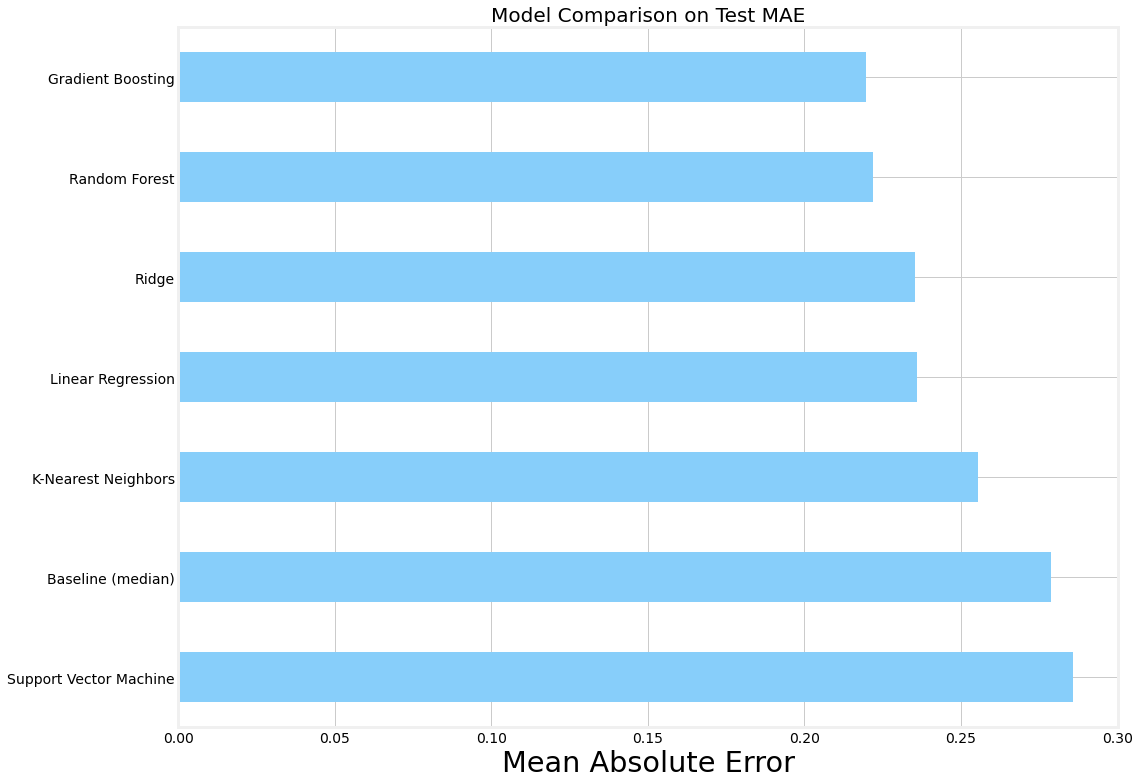

In [ ]:
model_comparison = pd.DataFrame({"model": ["Linear Regression", "Support Vector Machine",
                                           "Random Forest", "Gradient Boosting",
                                            "K-Nearest Neighbors", "Baseline (median)", "Ridge"],
                                 "mae": [lr_mae, svm_mae, random_forest_mae, 
                                         gradient_boosting_mae, knn_mae, basic_baseline_mae, ridge_mae]})
model_comparison.sort_values("mae", ascending=False).plot(x="model", y="mae", kind="barh",
                                                           color="lightskyblue", legend=False)
plt.ylabel(""); plt.yticks(size=14); plt.xlabel("Mean Absolute Error"); plt.xticks(size=14)
plt.title("Model Comparison on Test MAE", size=20);

In [ ]:
# Loss function to be optimized
loss = ["ls", "lad", "huber"]

# Maximum depth of each tree
max_depth = [2, 3, 5, 10, 15]

# Minimum number of samples per leaf
min_samples_leaf = [1, 2, 4, 6, 8]

# Minimum number of samples to split a node
min_samples_split = [2, 4, 6, 10]

# Maximum number of features to consider for making splits
max_features = ["auto", "sqrt", "log2", None]

hyperparameter_grid = {"loss": loss,
                       "max_depth": max_depth,
                       "min_samples_leaf": min_samples_leaf,
                       "min_samples_split": min_samples_split,
                       "max_features": max_features}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
basic_model = GradientBoostingRegressor(random_state = 42)

random_cv = RandomizedSearchCV(estimator=basic_model,
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=20, 
                               scoring="neg_mean_absolute_error",
                               n_jobs=-1, verbose=1, 
                               return_train_score=True,
                               random_state=42)

In [ ]:
random_cv.fit(features_train, target_train)

Fitting 4 folds for each of 20 candidates, totalling 80 fits


RandomizedSearchCV(cv=4, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'loss': ['ls', 'lad', 'huber'],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 4, 6, 10]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=1)

In [ ]:
random_results = pd.DataFrame(random_cv.cv_results_).sort_values("mean_test_score", ascending=False)
random_results.head(10)[["mean_test_score", "param_loss",
                         "param_max_depth", "param_min_samples_leaf", "param_min_samples_split",
                         "param_max_features"]]

,mean_test_score,param_loss,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_max_features
0,-0.200985,huber,15,8,6,log2
17,-0.201954,lad,15,2,4,log2
7,-0.202492,huber,5,6,6,auto
16,-0.208397,lad,3,1,10,log2
15,-0.208956,ls,5,4,6,auto
8,-0.210707,lad,2,4,10,auto
19,-0.212971,lad,2,1,10,sqrt
3,-0.213049,lad,2,8,10,sqrt
1,-0.214555,huber,2,2,4,None
2,-0.216843,ls,3,1,4,sqrt


In [ ]:
random_cv.best_estimator_

GradientBoostingRegressor(loss='huber', max_depth=15, max_features='log2',
                          min_samples_leaf=8, min_samples_split=6,
                          random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
trees_grid = {"n_estimators": [50, 100, 150, 200, 250, 300]}

basic_model = random_cv.best_estimator_
grid_search = GridSearchCV(estimator=basic_model, param_grid=trees_grid, cv=4, 
                           scoring="neg_mean_absolute_error", verbose=1,
                           n_jobs=-1, return_train_score=True)

In [ ]:
grid_search.fit(features_train, target_train);

Fitting 4 folds for each of 6 candidates, totalling 24 fits


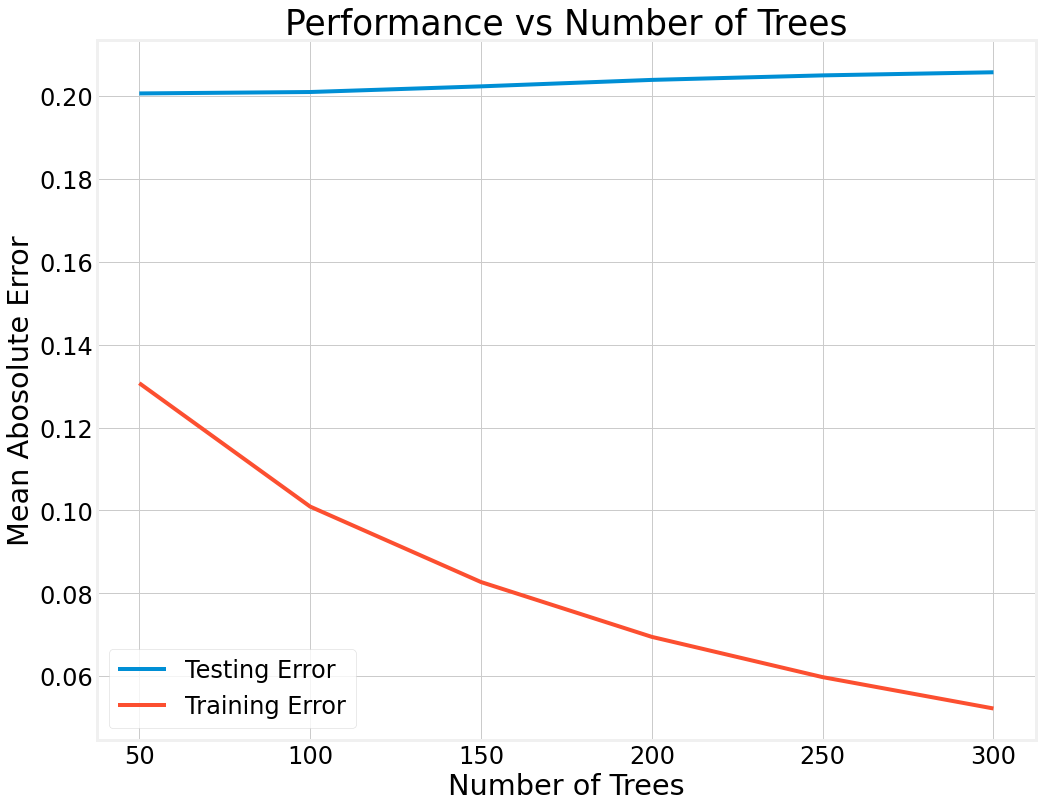

In [ ]:
results = pd.DataFrame(grid_search.cv_results_)

plt.plot(results["param_n_estimators"], -1 * results["mean_test_score"], label = "Testing Error")
plt.plot(results["param_n_estimators"], -1 * results["mean_train_score"], label = "Training Error")
plt.xlabel("Number of Trees"); plt.ylabel("Mean Abosolute Error"); plt.legend();
plt.title("Performance vs Number of Trees");

The graph shows that the model is overfitting. Training error keeps decreasing, while test error stays almost the same. It means that the model learns training examples very well, but cannot generalize on new, unknown data

In [ ]:
basic_final_model = grid_search.best_estimator_
basic_final_model

GradientBoostingRegressor(loss='huber', max_depth=15, max_features='log2',
                          min_samples_leaf=8, min_samples_split=6,
                          n_estimators=50, random_state=42)

In [ ]:
basic_final_pred = basic_final_model.predict(features_test)
basic_final_mae = mae(target_test, basic_final_pred)
print("Final model performance on the test set: MAE = {:.04f}.".format(basic_final_mae))

Final model performance on the test set: MAE = 0.2086.


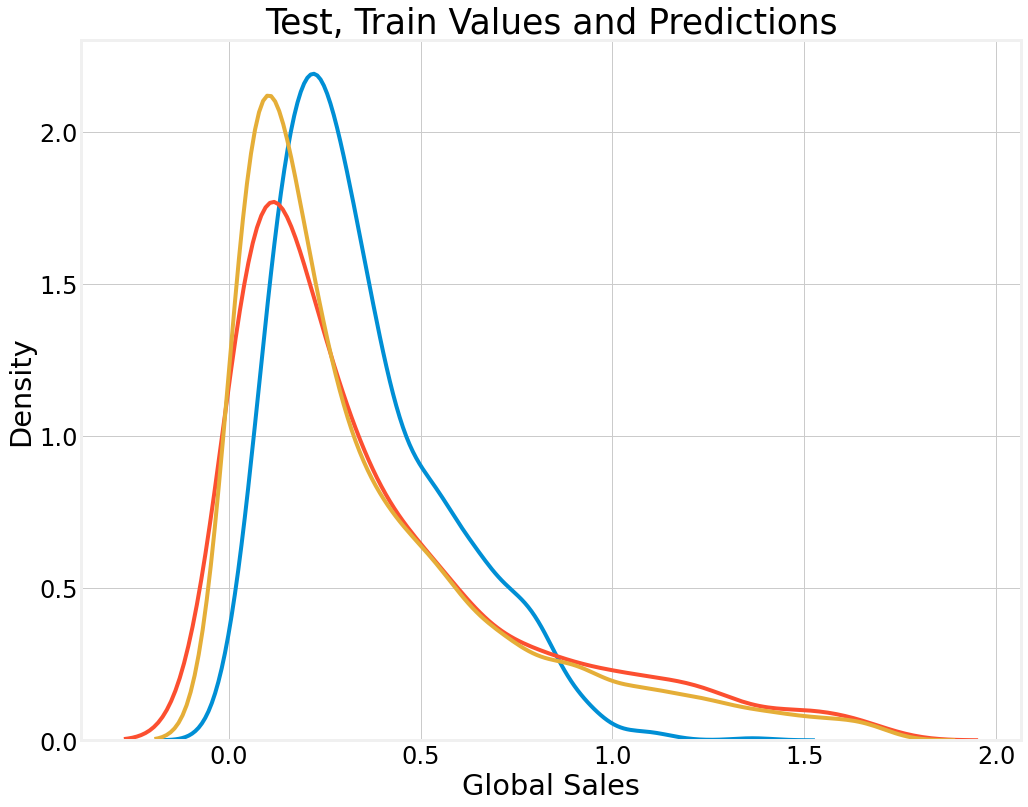

In [ ]:
sns.kdeplot(basic_final_pred, label = "Predictions")
sns.kdeplot(target_test, label = "Test")
sns.kdeplot(target_train, label = "Train")

plt.xlabel("Global Sales"); plt.ylabel("Density");
plt.title("Test, Train Values and Predictions");

Predictions density is moved a little to the right, comparing to densities of initial values. The tail is also different. This might help tuning the model in the future.

Second graph is a histogram of residuals - differences between real values and predictions.

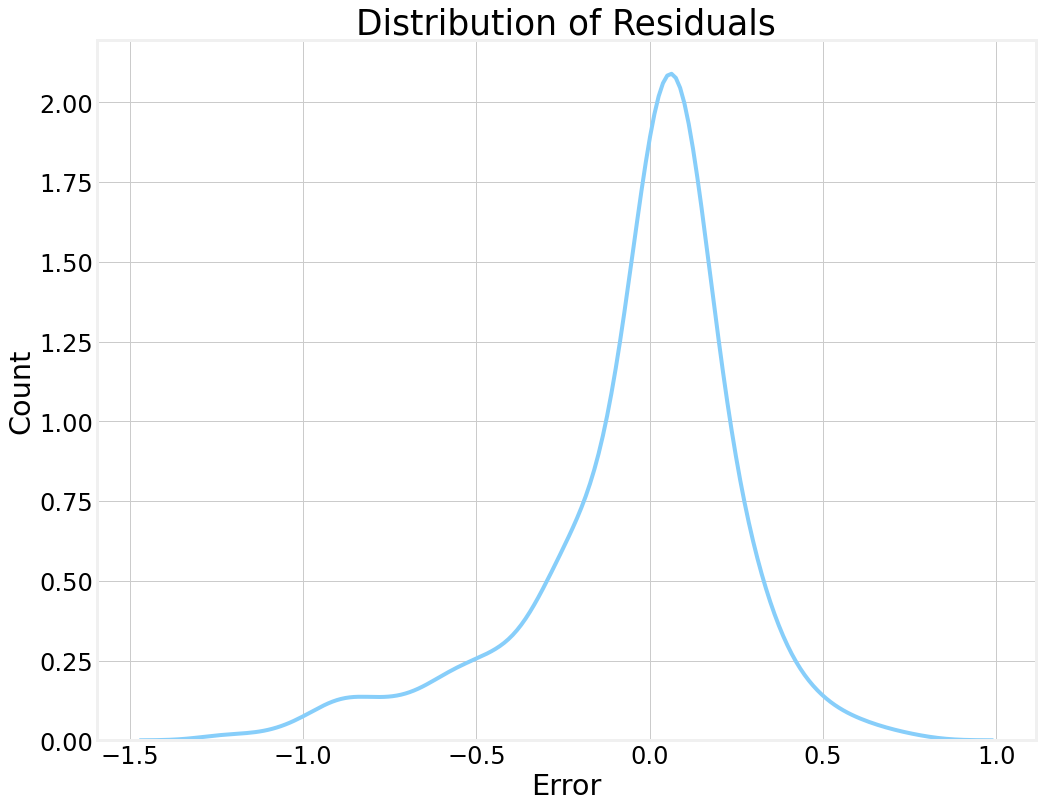

In [ ]:
basic_residuals = basic_final_pred - target_test

sns.kdeplot(basic_residuals, color = "lightskyblue")
plt.xlabel("Error"); plt.ylabel("Count")
plt.title("Distribution of Residuals");

Model 2

In [ ]:
def donut_chart(column, palette="Set2"):
    values = column.value_counts().values
    labels = column.value_counts().index
    plt.pie(values, colors=sns.color_palette(palette), 
            labels=labels, autopct="%1.1f%%", 
            startangle=90, pctdistance=0.85)
    #draw circle
    centre_circle = plt.Circle((0,0), 0.70, fc="white")
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

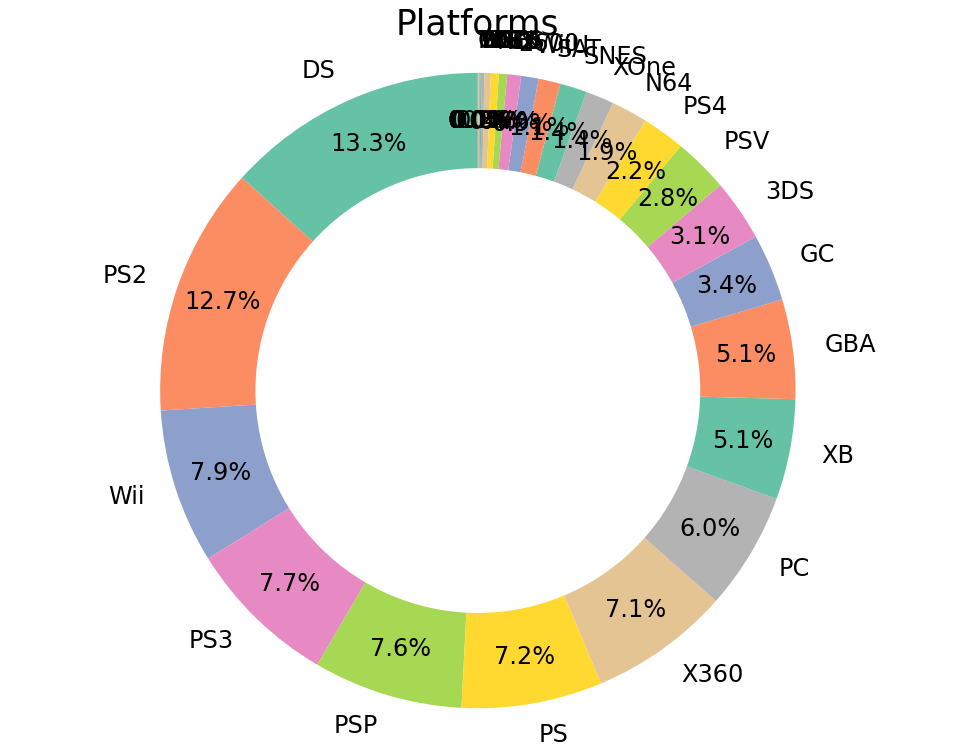

In [ ]:
donut_chart(data["Platform"])
plt.title("Platforms")
plt.axis("equal");

In [ ]:
data["Platform"].unique()

array(['Wii', 'PS2', 'PS3', 'PS', 'N64', 'GBA', 'DS', 'GC', 'X360', 'GB',
       'PC', '3DS', 'PSP', 'XB', 'NES', 'PS4', 'GEN', '2600', 'SNES',
       'XOne', 'WiiU', 'PSV', 'SCD', 'DC', 'SAT', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [ ]:
platforms = {"Playstation" : ["PS", "PS2", "PS3", "PS4"],
             "Xbox" : ["XB", "X360", "XOne"], 
             "PC" : ["PC"],
             "Nintendo" : ["Wii", "WiiU"],
             "Portable" : ["GB", "GBA", "GC", "DS", "3DS", "PSP", "PSV"]}

In [ ]:
def get_group_label(x, groups=None):
    if groups is None:
        return "Other"
    else:
        for key, val in groups.items():
            if x in val:
                return key
        return "Other"

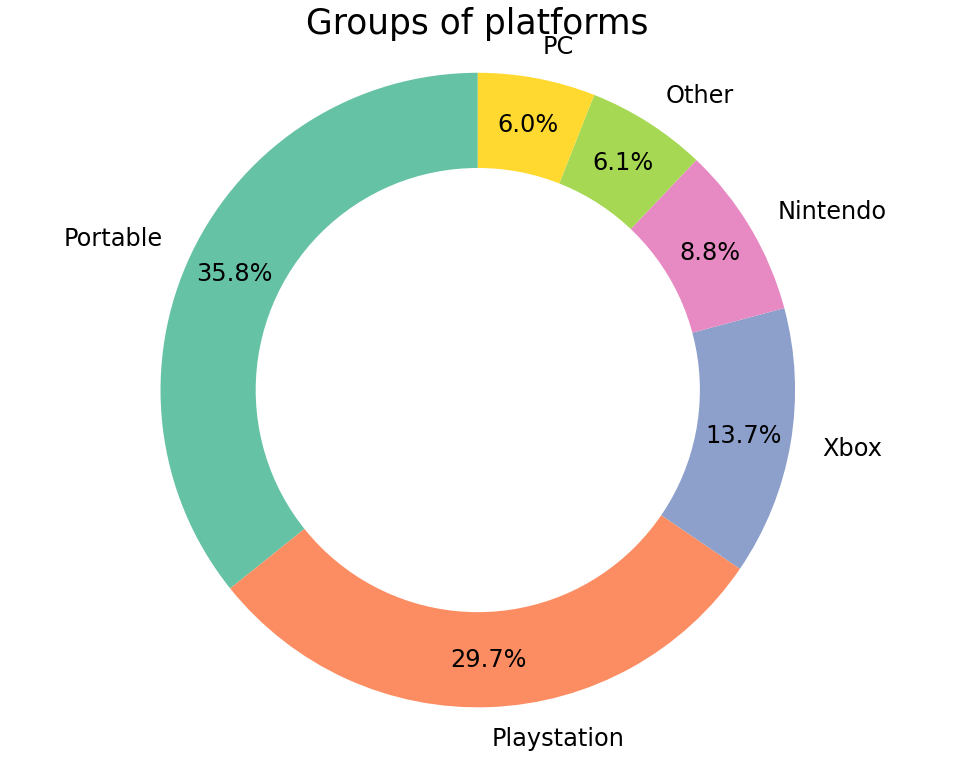

In [ ]:
data["Grouped_Platform"] = data["Platform"].apply(lambda x: get_group_label(x, groups=platforms))
donut_chart(data["Grouped_Platform"])
plt.title("Groups of platforms")
plt.axis("equal");

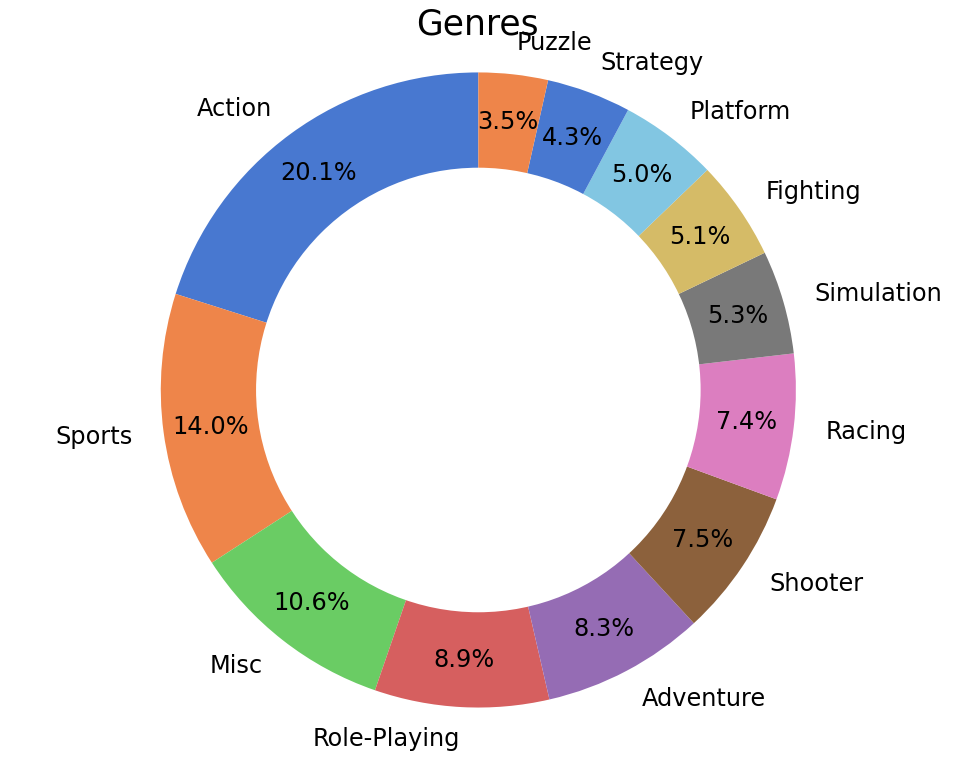

In [ ]:
donut_chart(data["Genre"], palette="muted")
plt.title("Genres")
plt.axis("equal");


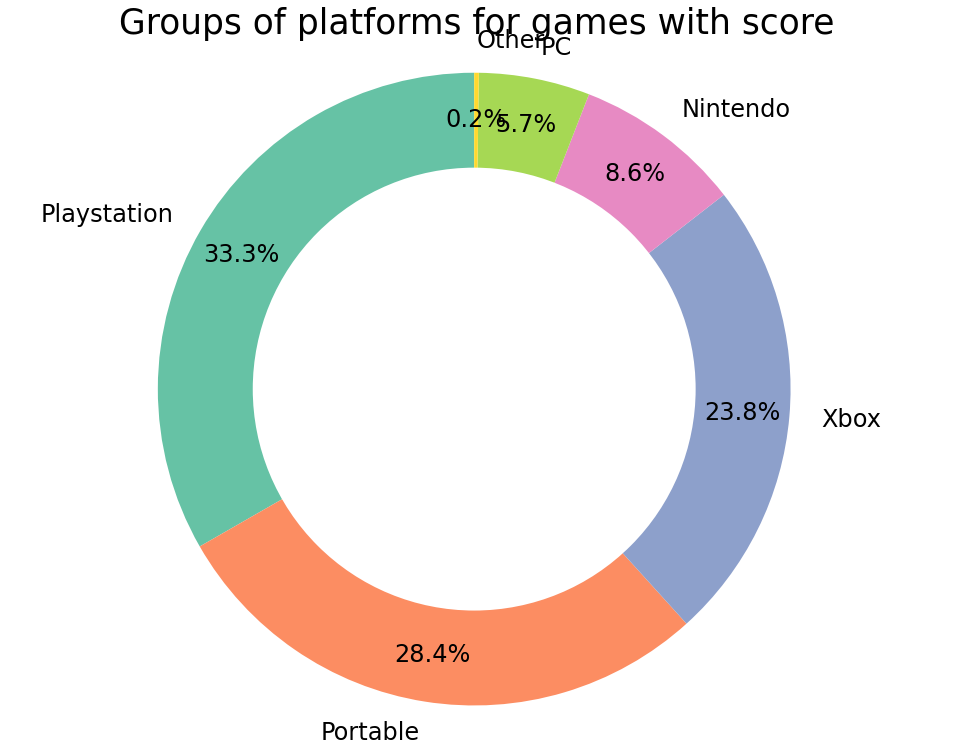

In [ ]:
scored["Grouped_Platform"] = scored["Platform"].apply(lambda x: get_group_label(x, platforms))
donut_chart(scored["Grouped_Platform"])
plt.title("Groups of platforms for games with score")
plt.axis("equal");

In [ ]:
scored[scored["Grouped_Platform"]=="Other"]

,Name,Platform,Year,Genre,Publisher,NA,EU,JP,Other,Global,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Age,Has_Score,Country,Grouped_Platform
1712,Shenmue,DC,1999,Adventure,Sega,0.52,0.24,0.38,0.04,1.18,88.0,9.0,9.4,201.0,Sega AM2,T,19,True,NA,Other
1877,NFL 2K1,DC,2000,Sports,Sega,1.02,0.05,0.00,0.02,1.09,97.0,22.0,6.0,47.0,Visual Concepts,E,18,True,NA,Other
3815,Seaman,DC,1999,Simulation,Sega,0.00,0.00,0.52,0.00,0.52,82.0,24.0,8.4,16.0,Vivarium,T,19,True,JP,Other
5350,SoulCalibur,DC,1999,Fighting,Namco Bandai Games,0.00,0.00,0.34,0.00,0.34,98.0,24.0,8.8,200.0,Namco,T,19,True,JP,Other
7231,Capcom vs. SNK,DC,2000,Fighting,Virgin Interactive,0.00,0.00,0.22,0.00,0.22,80.0,17.0,9.0,24.0,Capcom,T,18,True,JP,Other
7521,Phantasy Star Online,DC,2000,Role-Playing,Sega,0.00,0.00,0.20,0.00,0.20,89.0,21.0,9.1,33.0,Sonic Team,T,18,True,JP,Other
7643,Grandia II,DC,2000,Role-Playing,Ubisoft,0.00,0.00,0.20,0.00,0.20,90.0,17.0,8.8,57.0,Game Arts,T,18,True,JP,Other
7978,Phantasy Star Online Ver. 2,DC,2001,Role-Playing,Sega,0.00,0.00,0.19,0.00,0.19,80.0,10.0,8.9,18.0,Sonic Team,T,17,True,JP,Other
8905,Shenmue II,DC,2001,Adventure,Sega,0.00,0.00,0.15,0.00,0.15,88.0,9.0,9.4,201.0,Sega AM2,T,17,True,JP,Other
9559,Sega GT,DC,2000,Racing,Sega,0.00,0.00,0.13,0.00,0.13,84.0,25.0,7.7,11.0,TOSE,E,18,True,JP,Other


In [ ]:
scored["Weighted_Score"] = (scored["User_Score"] * 10 * scored["User_Count"] + 
                            scored["Critic_Score"] * scored["Critic_Count"]) / (scored["User_Count"] + scored["Critic_Count"])
devs = pd.DataFrame({"dev": scored["Developer"].value_counts().index,
                     "count": scored["Developer"].value_counts().values})
m_score = pd.DataFrame({"dev": scored.groupby("Developer")["Weighted_Score"].mean().index,
                        "mean_score": scored.groupby("Developer")["Weighted_Score"].mean().values})
devs = pd.merge(devs, m_score, on="dev")
devs = devs.sort_values(by="count", ascending=True)
devs["percent"] = devs["count"] / devs["count"].sum()
devs["top%"] = devs["percent"].cumsum() * 100
n_groups = 5
devs["top_group"] = (devs["top%"] * n_groups) // 100 + 1
devs["top_group"].iloc[-1] = n_groups
devs

,dev,count,mean_score,percent,top%,top_group
1179,Atomic Games,1,58.654545,0.000181,0.018070,1.0
842,Flying Lab Software,1,76.000000,0.000181,0.036140,1.0
843,Babylon Software,1,53.571429,0.000181,0.054210,1.0
844,GameCo,1,59.173913,0.000181,0.072280,1.0
845,Cyan Worlds,1,77.294118,0.000181,0.090351,1.0
...,...,...,...,...,...,...
4,Konami,78,70.298654,0.014095,92.410553,5.0
3,Ubisoft,86,65.797942,0.015540,93.964583,5.0
2,Capcom,92,74.710656,0.016625,95.627033,5.0
1,EA Sports,116,75.755345,0.020961,97.723166,5.0


 A graph to see the realtion between developer rank and mean weighted score of developer's games

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1667: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


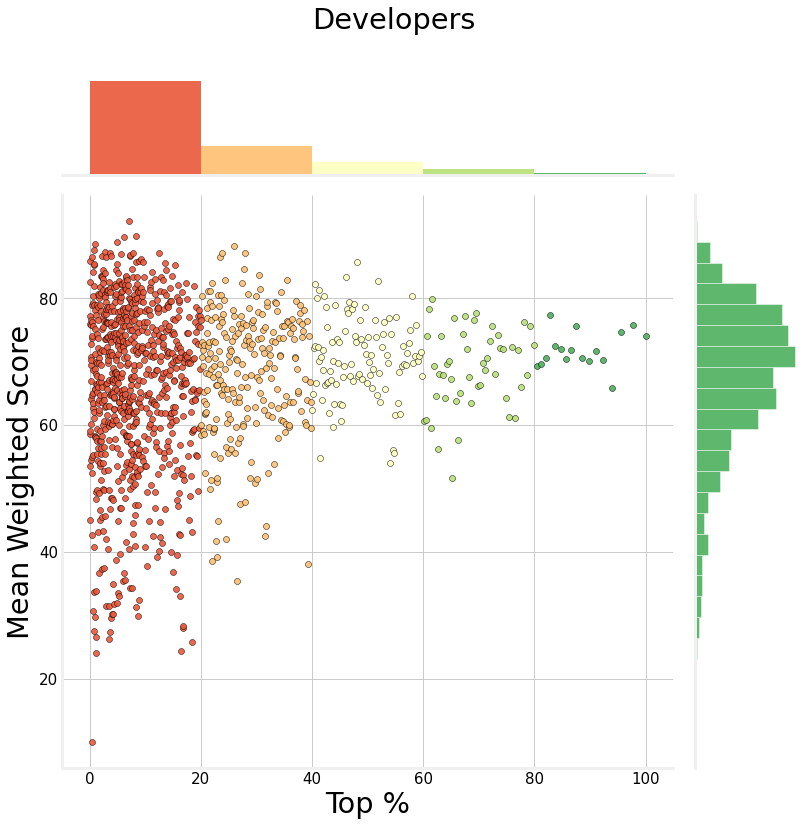

In [ ]:
pal = sns.color_palette("RdYlGn", n_groups)
g = sns.JointGrid(x="top%", y="mean_score", data=devs, size=12)
legend_elements = []
for k in range(0, n_groups):
    g.ax_joint.scatter(devs[devs["top_group"]==k+1]["top%"], 
                       devs[devs["top_group"]==k+1]["mean_score"],
                       color=pal[k], alpha=.9, edgecolor="black")
    legend_elements.append(Line2D([0], [0], label=k+1, marker="o", ls="", 
                                  mfc=pal[k], mec=pal[k], alpha=.9, markersize=15))
    g.ax_marg_x.bar(np.arange(k * 100 / n_groups, (k+1) * 100 / n_groups), 
                    devs[devs["top_group"]==k+1].shape[0], 
                    width=1, align="edge", color=pal[k], alpha=.9)
g.ax_marg_y.hist(devs["mean_score"], color=pal[-1], alpha=.9,
                 orientation="horizontal", bins=25, edgecolor="white")
g.set_axis_labels("Top %", "Mean Weighted Score")
g.ax_joint.tick_params(labelsize=15)
g.ax_marg_x.grid(False)
g.ax_marg_y.grid(False)
#g.ax_joint.legend(handles=legend_elements, title="Top Group", loc=4)
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Developers");

In [ ]:
data["Critic_Score"].fillna(0.0, inplace=True)
data["Critic_Count"].fillna(0.0, inplace=True)
data["User_Score"].fillna(0.0, inplace=True)
data["User_Count"].fillna(0.0, inplace=True)
data = data.join(devs.set_index("dev")["top_group"], on="Developer")
data = data.rename(columns={"top_group": "Developer_Rank"})
data["Developer_Rank"].fillna(0.0, inplace=True)
data["Rating"].fillna("None", inplace=True)

In [ ]:
tmp, rmvd_tmp = rm_outliers(data[data["User_Count"] != 0], ["User_Count"])
data.drop(rmvd_tmp.index, axis=0, inplace=True)

In [ ]:
data["Weighted_Score"] = (data["User_Score"] * 10 * data["User_Count"] + 
                            data["Critic_Score"] * data["Critic_Count"]) / (data["User_Count"] + data["Critic_Count"])
data["Weighted_Score"].fillna(0.0, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14743 entries, 1058 to 16718
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              14743 non-null  object 
 1   Platform          14743 non-null  object 
 2   Year              14743 non-null  int64  
 3   Genre             14743 non-null  object 
 4   Publisher         14712 non-null  object 
 5   NA                14743 non-null  float64
 6   EU                14743 non-null  float64
 7   JP                14743 non-null  float64
 8   Other             14743 non-null  float64
 9   Global            14743 non-null  float64
 10  Critic_Score      14743 non-null  float64
 11  Critic_Count      14743 non-null  float64
 12  User_Score        14743 non-null  float64
 13  User_Count        14743 non-null  float64
 14  Developer         8519 non-null   object 
 15  Rating            14743 non-null  object 
 16  Age               14743 non-null  int

In [ ]:
import category_encoders as ce
# Select the numeric columns
numeric_subset = data.select_dtypes("number").drop(columns=["NA", "EU", "JP", "Other", "Year"])

# Select the categorical columns
categorical_subset = data[["Grouped_Platform", "Genre", "Rating"]]

# One hot encode
# categorical_subset = pd.get_dummies(categorical_subset)

mapping = []
for cat in categorical_subset.columns:
    tmp = scored.groupby(cat).median()["Weighted_Score"]
    mapping.append({"col": cat, "mapping": [x for x in np.argsort(tmp).items()]})
    
encoder = ce.ordinal.OrdinalEncoder()
categorical_subset = encoder.fit_transform(categorical_subset, mapping=mapping)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

# Find correlations with the score 
correlations = features.corr()["Global"].dropna().sort_values()


In [ ]:
target = pd.Series(features["Global"])
features = features.drop(columns="Global")
features_train, features_test, target_train, target_test = train_test_split(features, target, 
                                                                            test_size=0.2,
                                                                            random_state=42)
baseline_guess = np.median(target_train)
baseline_mae = mae(target_test, baseline_guess)
print("Baseline guess for global sales is: {:.02f}".format(baseline_guess))
print("Baseline Performance on the test set: MAE = {:.04f}".format(baseline_mae))

Baseline guess for global sales is: 0.14
Baseline Performance on the test set: MAE = 0.2222


In [ ]:
model = GradientBoostingRegressor(random_state = 42)

random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=20, 
                               scoring="neg_mean_absolute_error",
                               n_jobs=-1, verbose=1, 
                               return_train_score=True,
                               random_state=42)
random_cv.fit(features_train, target_train);

Fitting 4 folds for each of 20 candidates, totalling 80 fits


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  FutureWarning,


In [ ]:
trees_grid = {"n_estimators": [50, 100, 150, 200, 250, 300]}

model = random_cv.best_estimator_
grid_search = GridSearchCV(estimator=model, param_grid=trees_grid, cv=4, 
                           scoring="neg_mean_absolute_error", verbose=1,
                           n_jobs=-1, return_train_score=True)
grid_search.fit(features_train, target_train);

Fitting 4 folds for each of 6 candidates, totalling 24 fits


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  FutureWarning,


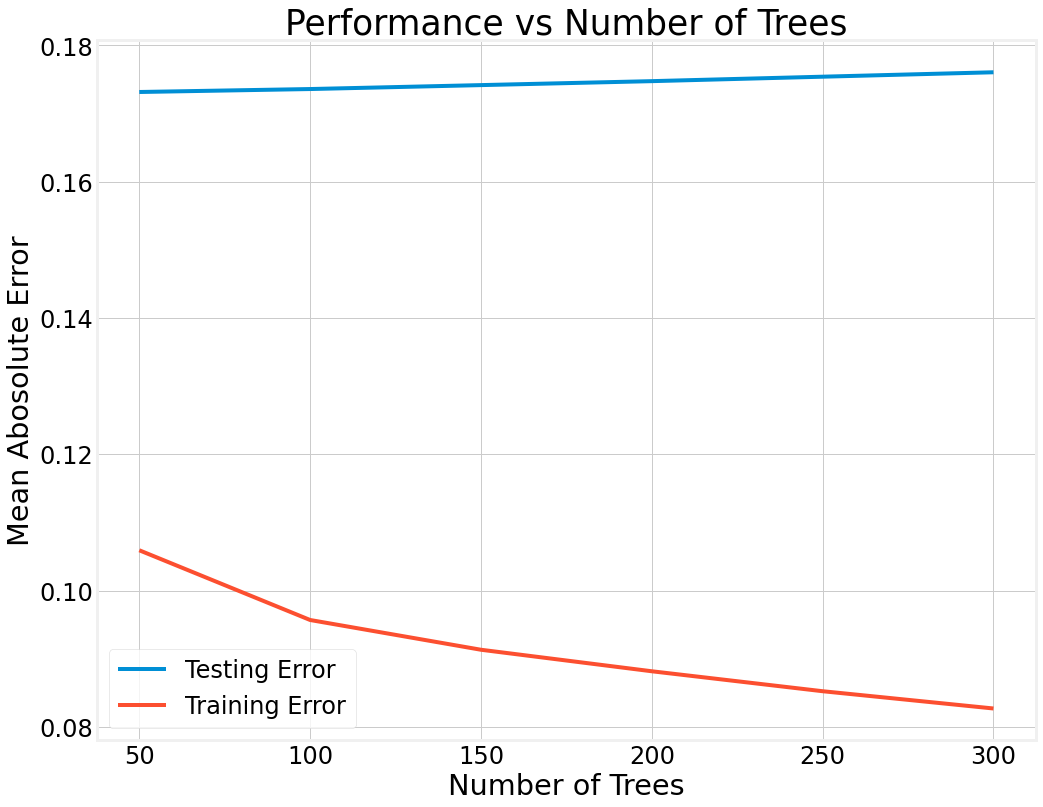

In [ ]:
results = pd.DataFrame(grid_search.cv_results_)

plt.plot(results["param_n_estimators"], -1 * results["mean_test_score"], label = "Testing Error")
plt.plot(results["param_n_estimators"], -1 * results["mean_train_score"], label = "Training Error")
plt.xlabel("Number of Trees"); plt.ylabel("Mean Abosolute Error"); plt.legend();
plt.title("Performance vs Number of Trees");

In [ ]:
final_model = grid_search.best_estimator_
final_pred = final_model.predict(features_test)
final_mae = mae(target_test, final_pred)
print("Final model performance on the test set: MAE = {:.04f}.".format(final_mae))

Final model performance on the test set: MAE = 0.1760.


Model 2 gives better results (lower error on test set) which is a good achievement, but the model is still overfitting (graph above).

Plots summarizing the results

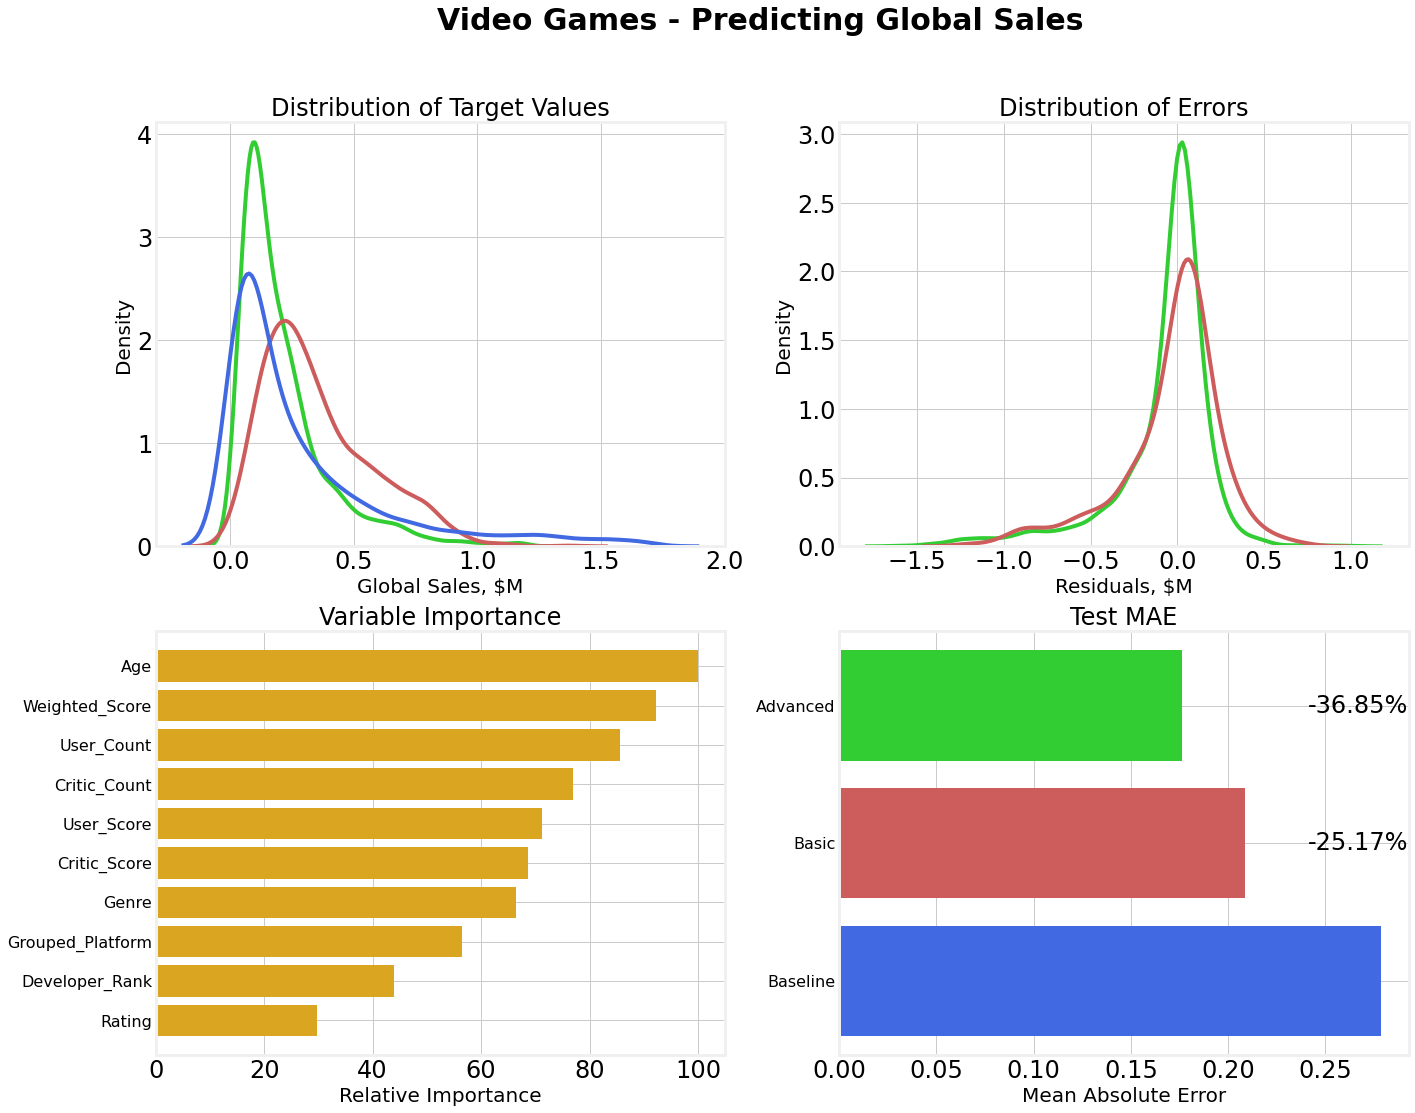

In [ ]:
import matplotlib.gridspec as gridspec
figsize(20, 16)

fig = plt.figure()
gs = gridspec.GridSpec(2, 2)

plt.suptitle("Video Games - Predicting Global Sales", size=30, weight="bold");

ax = fig.add_subplot(gs[0, 0])
plt.sca(ax)
sns.kdeplot(final_pred, color="limegreen", label="Advanced Model")
sns.kdeplot(basic_final_pred, color="indianred", label="Basic Model")
sns.kdeplot(target_test, color="royalblue", label="Test")
plt.xlabel("Global Sales, $M", size=20); plt.ylabel("Density", size=20);
plt.title("Distribution of Target Values", size=24);

residuals = final_pred - target_test
ax = fig.add_subplot(gs[0, 1])
plt.sca(ax)
sns.kdeplot(residuals, color = "limegreen", label="Advanced Model")
sns.kdeplot(basic_residuals, color="indianred", label="Basic Model")
plt.xlabel("Residuals, $M", size=20);plt.ylabel("Density", size=20);
plt.title("Distribution of Errors", size=24);

feature_importance = final_model.feature_importances_
feature_names = features.columns.tolist()
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
ax = fig.add_subplot(gs[1, 0])
plt.sca(ax)
plt.barh(pos, feature_importance[sorted_idx], align='center', color="goldenrod")
plt.yticks(pos, [feature_names[x] for x in sorted_idx], size=16)
plt.xlabel('Relative Importance', size=20)
plt.title('Variable Importance', size=24);
model_comparison = pd.DataFrame({"model": ["Baseline", "Basic", "Advanced"],
                                 "mae": [basic_baseline_mae, basic_final_mae, final_mae],
                                 "diff": ["0.00%", "-{:.2f}%".format((1 - basic_final_mae / basic_baseline_mae) * 100), "-{:.2f}%".format((1 - final_mae / basic_baseline_mae) * 100)],
                                 "color": ["royalblue", "indianred", "limegreen"]})
model_comparison.sort_values("mae", ascending=False)
pos = np.arange(3) + .5
ax = fig.add_subplot(gs[1, 1])
plt.sca(ax)
plt.barh(pos, model_comparison["mae"], align="center", color=model_comparison["color"])
for i in [1, 2]:
    plt.text(plt.xlim()[1], pos[i], model_comparison["diff"][i], 
             verticalalignment="center", horizontalalignment="right")
plt.yticks(pos, model_comparison["model"], size=16); plt.xlabel("Mean Absolute Error", size=20);
plt.title("Test MAE", size=24);